<a href="https://colab.research.google.com/github/harikrishnanC98/AnomalyDetection/blob/main/AnomalyDetection_LOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as rnf
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [5]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/DBSE")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/DBSE'

In [10]:
df = pd.read_csv('fraudTrain.csv')

In [18]:
df.head()
duplicate = pd.DataFrame.duplicated(df)
try:
    print(str(len(df)/len(duplicate[duplicate.iloc[:] == True])*100)+"% are duplicate values")
    train_df.drop_duplicates(implace=True)
    df.drop_duplicates(implace=True)
except ZeroDivisionError:
    print("no duplicates found")

no duplicates found


In [19]:
#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

In [22]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [26]:

# Converting 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Deriving additional columns
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Print the updated DataFrame
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


In [27]:
#finding age
#converting 'dob' column to datetime
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] -
                      df['dob'])/np.timedelta64(1, 'Y'))
df.age.head()

0   31.000000
1   41.000000
2   57.000000
3   52.000000
4   33.000000
Name: age, dtype: float64

In [28]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000


In [29]:
#initial dropping of non-relevant features
df.drop(['Unnamed: 0','trans_date_trans_time','cc_num','first', 'last', 'dob','merchant','street','city','state','lat','long','job','trans_num','unix_time','merch_lat','merch_long'] , axis=1, inplace=True)

In [30]:
df.head()

,category,amt,gender,zip,city_pop,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,misc_net,4.970000,F,28654,3495,0,0,Tuesday,2019-01,31.000000
1,grocery_pos,107.230000,F,99160,149,0,0,Tuesday,2019-01,41.000000
2,entertainment,220.110000,M,83252,4154,0,0,Tuesday,2019-01,57.000000
3,gas_transport,45.000000,M,59632,1939,0,0,Tuesday,2019-01,52.000000
4,misc_pos,41.960000,M,24433,99,0,0,Tuesday,2019-01,33.000000


In [32]:
df_org = df.copy()
df.is_fraud.value_counts(normalize=True)*100

0   99.421135
1    0.578865
Name: is_fraud, dtype: float64

In [38]:
df1 = df.copy()

In [40]:
#one-hot encoding the category variable
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
#one-hot encoding the gender variable
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
#one-hot encoding the day_of_week variable
day_of_week_onehot = pd.get_dummies(df.trans_day_of_week, prefix='day', drop_first=True)

In [41]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [42]:
df1.head()

,category,amt,gender,zip,city_pop,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,misc_net,4.970000,F,28654,3495,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,grocery_pos,107.230000,F,99160,149,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,entertainment,220.110000,M,83252,4154,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,gas_transport,45.000000,M,59632,1939,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,misc_pos,41.960000,M,24433,99,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [43]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Get the correlation values with the target variable
correlation_with_target = correlation_matrix['is_fraud'].abs()

# Sort the correlation values in descending order
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Print the sorted correlation values
print(sorted_correlation)

is_fraud                  1.000000
amt                       0.219404
category_shopping_net     0.044261
category_grocery_pos      0.035558
category_misc_net         0.025886
category_home             0.017848
category_food_dining      0.015025
category_kids_pets        0.014967
category_health_fitness   0.014885
trans_hour                0.013799
age                       0.012272
category_personal_care    0.012167
category_misc_pos         0.008937
gender_M                  0.007642
day_Monday                0.007424
category_grocery_net      0.007136
category_travel           0.006924
day_Sunday                0.006038
category_shopping_pos     0.005955
day_Thursday              0.004979
category_gas_transport    0.004851
day_Wednesday             0.003381
zip                       0.002162
city_pop                  0.002136
day_Saturday              0.001790
day_Tuesday               0.000232
Name: is_fraud, dtype: float64


In [44]:
#concatenated table
df2 = df1.copy()

In [45]:
df1.drop(['day_Tuesday','day_Saturday','city_pop','zip','day_Wednesday','category_gas_transport','day_Thursday','category_shopping_pos','day_Sunday','category_travel','category_grocery_net','day_Monday','gender_M','category_misc_pos'],axis=1, inplace=True)
df1.columns

Index(['category', 'amt', 'gender', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age', 'category_food_dining',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_personal_care',
       'category_shopping_net'],
      dtype='object')

In [46]:
features = df1[['category', 'amt', 'gender', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age', 'category_food_dining',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_personal_care',
       'category_shopping_net']]

In [47]:
target = df1['is_fraud']

In [51]:
df1.head()

,category,amt,gender,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age,category_food_dining,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_personal_care,category_shopping_net
0,misc_net,4.970000,F,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,1,0,0
1,grocery_pos,107.230000,F,0,0,Tuesday,2019-01,41.000000,0,1,0,0,0,0,0,0
2,entertainment,220.110000,M,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0
3,gas_transport,45.000000,M,0,0,Tuesday,2019-01,52.000000,0,0,0,0,0,0,0,0
4,misc_pos,41.960000,M,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0


In [52]:
df1.drop(['gender','trans_day_of_week','trans_year_month','category'],axis=1, inplace=True)
df1.columns

Index(['amt', 'is_fraud', 'trans_hour', 'age', 'category_food_dining',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_personal_care',
       'category_shopping_net'],
      dtype='object')

In [53]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [54]:

# Create the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [56]:
df1.head()

,amt,is_fraud,trans_hour,age,category_food_dining,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_personal_care,category_shopping_net
0,4.970000,0,0,31.000000,0,0,0,0,0,1,0,0
1,107.230000,0,0,41.000000,0,1,0,0,0,0,0,0
2,220.110000,0,0,57.000000,0,0,0,0,0,0,0,0
3,45.000000,0,0,52.000000,0,0,0,0,0,0,0,0
4,41.960000,0,0,33.000000,0,0,0,0,0,0,0,0


In [57]:
features = df1[['amt', 'trans_hour', 'age', 'category_food_dining',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_personal_care',
       'category_shopping_net']]

In [58]:
target = df1['is_fraud']

In [59]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [60]:
# Create the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [61]:
# Fit the LOF model to the training data
lof.fit(X_train)

LocalOutlierFactor(contamination=0.1)

In [62]:
# Predict outliers on the test data
outlier_labels = lof.fit_predict(X_test)

In [68]:
for record_num, label in enumerate(outlier_labels[:50]):
    record_num += 1  # Increment record number by 1
    if label == -1:
        print(f"Record {record_num}: Outlier")
    else:
        print(f"Record {record_num}: Inlier")

Record 1: Inlier
Record 2: Inlier
Record 3: Inlier
Record 4: Inlier
Record 5: Inlier
Record 6: Inlier
Record 7: Inlier
Record 8: Inlier
Record 9: Inlier
Record 10: Inlier
Record 11: Inlier
Record 12: Inlier
Record 13: Inlier
Record 14: Inlier
Record 15: Inlier
Record 16: Inlier
Record 17: Inlier
Record 18: Inlier
Record 19: Inlier
Record 20: Inlier
Record 21: Inlier
Record 22: Outlier
Record 23: Inlier
Record 24: Inlier
Record 25: Inlier
Record 26: Inlier
Record 27: Inlier
Record 28: Inlier
Record 29: Inlier
Record 30: Inlier
Record 31: Inlier
Record 32: Outlier
Record 33: Inlier
Record 34: Inlier
Record 35: Inlier
Record 36: Inlier
Record 37: Inlier
Record 38: Inlier
Record 39: Inlier
Record 40: Inlier
Record 41: Outlier
Record 42: Inlier
Record 43: Outlier
Record 44: Inlier
Record 45: Inlier
Record 46: Outlier
Record 47: Inlier
Record 48: Outlier
Record 49: Inlier
Record 50: Inlier


In [71]:
# Calculate precision and recall
precision = precision_score(y_test, outlier_labels, average='weighted')
recall = recall_score(y_test, outlier_labels, average='weighted')

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)


Precision: 2.7221310186158242e-05
Recall: 0.004179921722868105


## **Updated**

In [41]:
dfTrain = pd.read_csv('fraudTrain.csv')

In [42]:
#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

In [43]:
dfTrain['trans_date_trans_time'] = pd.to_datetime(dfTrain['trans_date_trans_time'])

# Extract date and hour into separate columns
dfTrain.insert(loc=1, column='hour', value=dfTrain['trans_date_trans_time'].dt.hour)
dfTrain.insert(loc=2, column='day', value=dfTrain['trans_date_trans_time'].dt.day)
dfTrain.insert(loc=3, column='month', value=dfTrain['trans_date_trans_time'].dt.month)

dfTrain.head()

,Unnamed: 0,hour,day,month,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,1,1,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,0,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,0,1,1,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,0,1,1,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,0,1,1,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [44]:
# Applying log transformation for amt
import numpy as np

dfTrain['amt_log'] = np.log(dfTrain['amt'])

dfTrain['amt_log'].head()

0   1.603420
1   4.674976
2   5.394127
3   3.806662
4   3.736717
Name: amt_log, dtype: float64

In [45]:
# Applying log transformation for city_pop
dfTrain['city_pop_log'] = np.log(dfTrain['city_pop'])

dfTrain['city_pop_log'].head()

0   8.159089
1   5.003946
2   8.331827
3   7.569928
4   4.595120
Name: city_pop_log, dtype: float64

In [46]:
# Converting dob to age and applying log transformation on age
from datetime import datetime

dfTrain['dob'] = pd.to_datetime(dfTrain['dob'])  # Convert 'dob' column to datetime format
current_date = datetime.now()  # Get the current date

dfTrain['age'] = (current_date - dfTrain['dob']).dt.days // 365

dfTrain['age'] = np.log(dfTrain['age'])

dfTrain['age'].head()

0   3.555348
1   3.806662
2   4.110874
3   4.025352
4   3.610918
Name: age, dtype: float64

In [47]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of OneHotEncoder
encoder = LabelEncoder()
# Fit and transform the 'category' column
dfTrain['category_enc'] = encoder.fit_transform(dfTrain[['category']])
dfTrain['gender_enc'] = encoder.fit_transform(dfTrain[['gender']])
dfTrain['state_enc'] = encoder.fit_transform(dfTrain[['state']])

dfTrain.head()

,Unnamed: 0,hour,day,month,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_log,city_pop_log,age,category_enc,gender_enc,state_enc
0,0,0,1,1,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1.603420,8.159089,3.555348,8,0,27
1,1,0,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,4.674976,5.003946,3.806662,4,0,47
2,2,0,1,1,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,5.394127,8.331827,4.110874,0,1,13
3,3,0,1,1,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,3.806662,7.569928,4.025352,2,1,26
4,4,0,1,1,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3.736717,4.595120,3.610918,9,1,45


In [48]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

col_to_standardize = ['lat', 'long', 'merch_lat', 'merch_long']
# Fit the scaler to your dataframe
scaler.fit(dfTrain[col_to_standardize])

# Convert the transformed array back to a dataframe
dfTrain[col_to_standardize] = scaler.transform(dfTrain[col_to_standardize])

In [49]:
X = dfTrain.drop(['Unnamed: 0',	'trans_date_trans_time', 'cc_num', 'merchant',
                           'category', 'amt', 'first', 'last', 'gender', 'street', 'city',
                           'state', 'zip', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'is_fraud'], axis=1)

y = dfTrain['is_fraud']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_valset, y_train, y_valset = train_test_split(X, y, test_size=0.3, random_state=13)

X_train.head()

,hour,day,month,lat,long,merch_lat,merch_long,amt_log,city_pop_log,age,category_enc,gender_enc,state_enc
146006,21,19,3,-1.495648,0.507224,-1.473481,0.434965,3.797061,11.454502,3.555348,7,0,10
905557,8,28,12,0.611485,-0.457652,0.619256,-0.418534,4.469923,7.464510,3.891820,4,0,29
11861,21,7,1,1.958502,-2.333600,2.091524,-2.326058,5.030895,9.607168,3.891820,6,0,47
859134,23,16,12,0.523518,0.057085,0.358559,0.059260,3.421327,6.625392,4.110874,7,0,14
258255,18,8,5,1.737158,-0.477624,1.676697,-0.442878,1.603420,6.647688,3.931826,12,0,23


In [51]:
X_valset.shape

(389003, 13)

In [52]:
y_train.value_counts()

0    902425
1      5247
Name: is_fraud, dtype: int64

## **LOF Model**

In [53]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor

# Define the parameter grid
param_grid = {
    'n_neighbors': [10, 20, 30, 40, 50],
    'contamination': [0.05, 0.1, 0.15, 0.2, 0.25]
}

# Create the LOF model
lof = LocalOutlierFactor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lof, param_grid=param_grid, scoring='recall')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new LOF model with the best hyperparameters
lof_best = LocalOutlierFactor(n_neighbors=best_params['n_neighbors'], contamination=best_params['contamination'])
'''

#Create the LOF model
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.1)

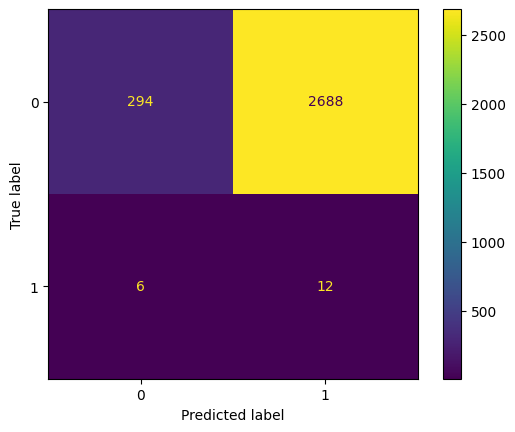

Trained Instances 1: Recall = 0.6666666666666666


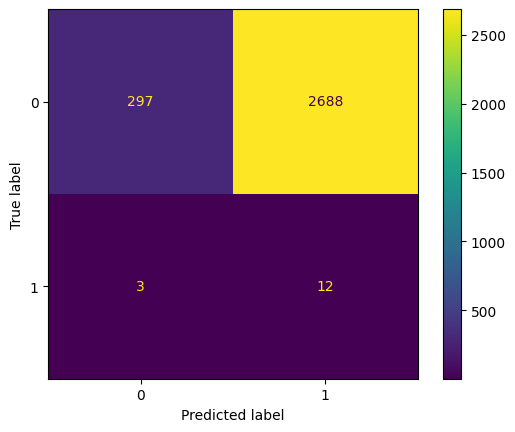

Trained Instances 10001: Recall = 0.8


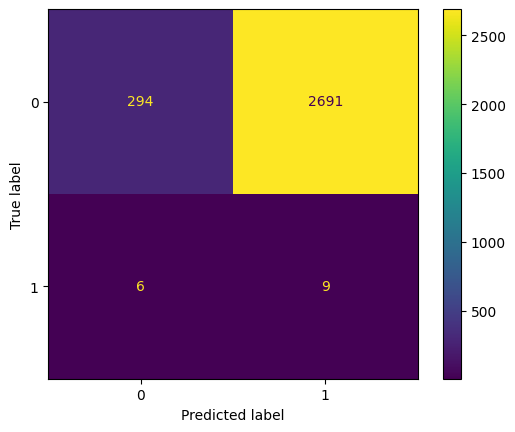

Trained Instances 20001: Recall = 0.6


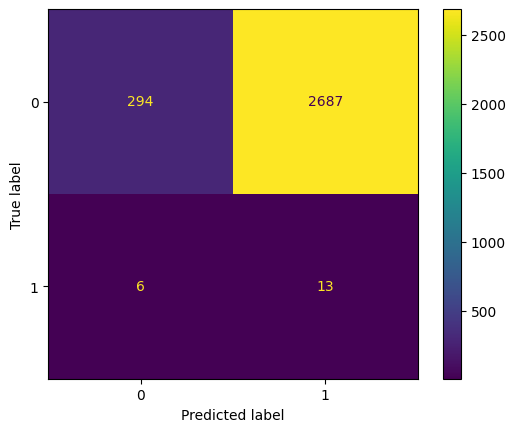

Trained Instances 30001: Recall = 0.6842105263157895


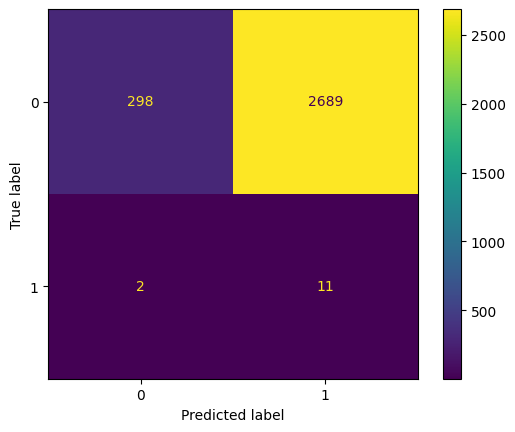

Trained Instances 40001: Recall = 0.8461538461538461


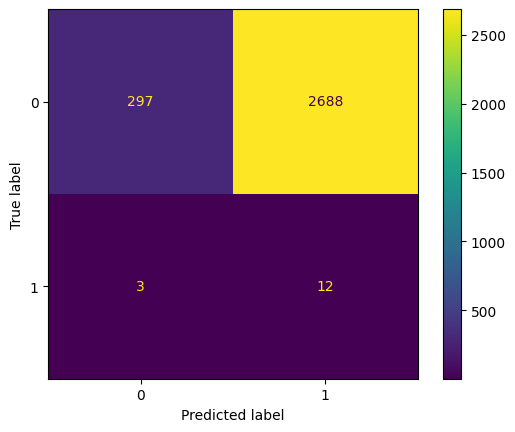

Trained Instances 50001: Recall = 0.8


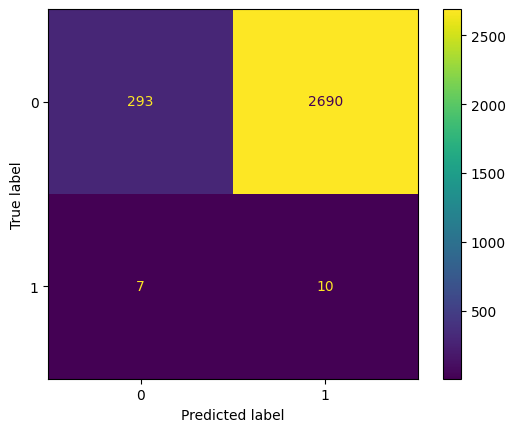

Trained Instances 60001: Recall = 0.5882352941176471


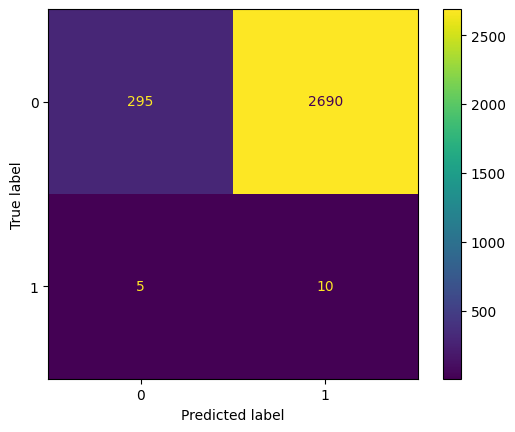

Trained Instances 70001: Recall = 0.6666666666666666


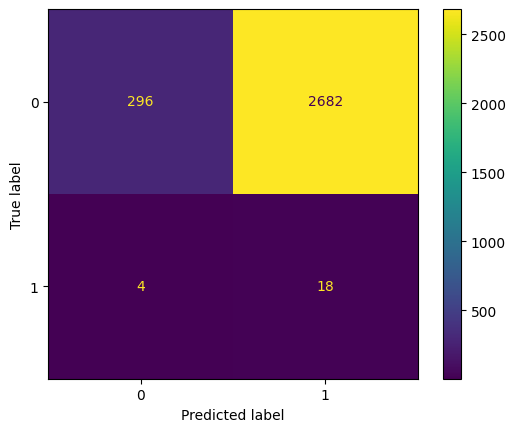

Trained Instances 80001: Recall = 0.8181818181818182


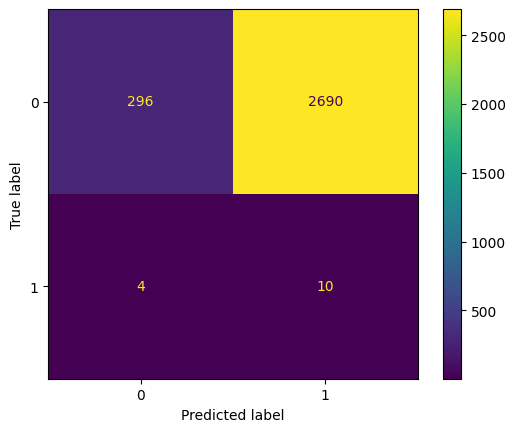

Trained Instances 90001: Recall = 0.7142857142857143


In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
batch_size = 10000
num_instances = 100000

val_chunk_size = 3000

for i in range(0, num_instances, batch_size):
    # Select the current batch of instances
    X_batch = X_train[i:i+batch_size]

    # Fit the One-Class SVM on the current batch
    lof.fit(X_batch)

    X_val_chunk = X_valset[i:i+val_chunk_size]
    y_val_chunk = y_valset[i:i+val_chunk_size]

    # Evaluate the model on the validation chunk
    y_val_pred = lof.fit_predict(X_val_chunk)

    y_val_pred_map = []
    # Change the anomalies' values to make it consistent with the true values
    for pred in y_val_pred:
      if pred < 0:
        y_val_pred_map.append(0)
      else:
        y_val_pred_map.append(1)

    cm = confusion_matrix(y_val_chunk, y_val_pred_map)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

    # Compute recall score for the validation chunk
    recall = recall_score(y_val_chunk, y_val_pred_map)
    #print(classification_report(y_val_chunk, y_val_pred))
    # Print the recall value
    print(f"Trained Instances {i+1}: Recall = {recall}")

In [55]:
dfTest = pd.read_csv('fraudTest.csv')

In [56]:
dfTest['trans_date_trans_time'] = pd.to_datetime(dfTest['trans_date_trans_time'])

# Extract date and hour into separate columns
dfTest.insert(loc=1, column='hour', value=dfTest['trans_date_trans_time'].dt.hour)
dfTest.insert(loc=2, column='day', value=dfTest['trans_date_trans_time'].dt.day)
dfTest.insert(loc=3, column='month', value=dfTest['trans_date_trans_time'].dt.month)

In [57]:
# Applying log transformation for amt
dfTest['amt_log'] = np.log(dfTest['amt'])

dfTest['amt_log'].head()

0   1.050822
1   3.395850
2   3.720378
3   4.095178
4   1.160021
Name: amt_log, dtype: float64

In [58]:
dfTest['city_pop_log'] = np.log(dfTest['city_pop'])

In [59]:
dfTest['dob'] = pd.to_datetime(dfTest['dob'])  # Convert 'dob' column to datetime format
current_date = datetime.now()  # Get the current date

dfTest['age'] = (current_date - dfTest['dob']).dt.days // 365

dfTest['age'] = np.log(dfTest['age'])

In [60]:
dfTest['category_enc'] = encoder.fit_transform(dfTest[['category']])
dfTest['gender_enc'] = encoder.fit_transform(dfTest[['gender']])
dfTest['state_enc'] = encoder.fit_transform(dfTest[['state']])

In [61]:
X_test = dfTest.drop(['Unnamed: 0',	'trans_date_trans_time', 'cc_num', 'merchant',
                           'category', 'amt', 'first', 'last', 'gender', 'street', 'city',
                           'state', 'zip', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'is_fraud'], axis=1)

y_test = dfTest['is_fraud']

In [62]:
y_pred = lof.fit_predict(X_test)

# Change the anomalies' values to make it consistent with the true values
y_pred = [0 if i==-1 else 1 for i in y_pred]


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.10      0.18    553574
           1       0.00      0.63      0.01      2145

    accuracy                           0.10    555719
   macro avg       0.49      0.36      0.09    555719
weighted avg       0.98      0.10      0.18    555719



In [70]:
# Threshold for outlier classification
threshold = 2.0

# Creating empty list to store explanations
explanations = []

# Predicting outliers on the test data
y_pred_test = lof.fit_predict(X_test)

# Iterating over each instance in the test data
for i, instance in enumerate(X_test[:100]):
    # Checking if the instance is classified as an outlier
    if y_pred_test[i] == -1:
        lof_score = lof.negative_outlier_factor_[i]
        explanation = f"Instance {i+1} is classified as an outlier (LOF Score: {lof_score})"
        # Adding additional conditions or feature-based explanations here if desired
        explanations.append(explanation)

# Printing the explanations for the first 100 instances
for explanation in explanations:
    print(explanation)

Instance 1 is classified as an outlier (LOF Score: -1.1173464406233342)
Instance 7 is classified as an outlier (LOF Score: -1.0878963892243039)
Instance 13 is classified as an outlier (LOF Score: -1.1672365335554789)


### **Cardiovascular disease data set**

In [24]:
dfcTrain = pd.read_csv('cardio_train.csv',delimiter=';')

In [25]:
dfcTrain.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [26]:
dfcTrain['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

## **Preprocessing**

In [27]:
dfcTrain['age'] = dfcTrain['age']/365
dfcTrain['age'] = dfcTrain['age'].round(2)

In [28]:
dfcTrain['height'] = dfcTrain['height']*0.032808399
dfcTrain['height'] = dfcTrain['height'].round(2)

In [29]:
dfcTrain = dfcTrain.rename(columns={'age': 'age_years', 'height': 'height_ft'})

dfcTrain = dfcTrain.drop("id", axis=1)

In [30]:
dfcTrain.head()

,age_years,gender,height_ft,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.39,2,5.51,62.0,110,80,1,1,0,0,1,0
1,55.42,1,5.12,85.0,140,90,3,1,0,0,1,1
2,51.66,1,5.41,64.0,130,70,3,1,0,0,0,1
3,48.28,2,5.54,82.0,150,100,1,1,0,0,1,1
4,47.87,1,5.12,56.0,100,60,1,1,0,0,0,0


In [31]:
dfcTrain['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [32]:
train_data, test_data = train_test_split(dfcTrain, test_size=0.3, random_state=42)

In [104]:
'''
# Separate instances belonging to class 0 and class 1 in the train dataset
class_0_instances_train = train_data[train_data['cardio'] == 0]
class_1_instances_train = train_data[train_data['cardio'] == 1]

# Calculate the number of instances needed for 5% of class 1 in the train dataset
num_class_1_instances_train = int(0.05 * len(class_1_instances_train))

# Sample 5% of class 1 instances randomly from the train dataset
class_1_sample_train = class_1_instances_train.sample(n=num_class_1_instances_train, random_state=42)

# Combine the sampled class 1 instances with all class 0 instances in the train dataset
train_data = pd.concat([class_0_instances_train, class_1_sample_train])

# Shuffle the train dataset to ensure randomness
train_data = train_data.sample(frac=1, random_state=42)
'''

In [33]:
train_data['cardio'].value_counts(normalize=True)

0    0.501224
1    0.498776
Name: cardio, dtype: float64

In [34]:
train_data = train_data.reset_index(drop=True)

X_train_data = train_data.drop("cardio", axis=True)

y_train_data = train_data["cardio"]

In [35]:
X_train_data.head()

,age_years,gender,height_ft,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,55.94,1,5.25,64.0,120,90,3,1,0,0,1
1,62.16,2,5.48,65.0,120,80,3,3,0,0,0
2,62.42,1,5.25,66.0,120,90,1,1,0,0,1
3,62.05,1,5.35,55.0,125,90,3,1,0,0,1
4,59.48,1,5.18,85.0,150,80,3,1,0,0,1


In [36]:
# Create the LOF model
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.1)

In [37]:
# Fit the LOF model to the training data
lof.fit(X_train_data)

LocalOutlierFactor(contamination=0.1, n_neighbors=50)

In [110]:
'''
# Separate instances belonging to class 0 and class 1 in the test dataset
class_0_instances_test = test_data[test_data['cardio'] == 0]
class_1_instances_test = test_data[test_data['cardio'] == 1]

# Calculate the number of instances needed for 5% of class 1 in the test dataset
num_class_1_instances_test = int(0.05 * len(class_1_instances_test))

# Sample 5% of class 1 instances randomly from the test dataset
class_1_sample_test = class_1_instances_test.sample(n=num_class_1_instances_test, random_state=42)

# Combine the sampled class 1 instances with all class 0 instances in the test dataset
test_data = pd.concat([class_0_instances_test, class_1_sample_test])

# Shuffle the test dataset to ensure randomness
test_data = test_data.sample(frac=1, random_state=42)
'''

In [38]:
test_data = test_data.reset_index(drop=True)

X_test_data = test_data.drop("cardio", axis=True)

y_test_data = test_data["cardio"]

In [39]:
# Predict outliers on the test data
outlier_labels = lof.fit_predict(X_test_data)

In [40]:
# Change the anomalies' values to make it consistent with the true values
outlier_labels = [1 if i==-1 else 0 for i in outlier_labels]
# Check the model performance
print(classification_report(y_test_data, outlier_labels))

              precision    recall  f1-score   support

           0       0.50      0.90      0.64     10461
           1       0.50      0.10      0.17     10539

    accuracy                           0.50     21000
   macro avg       0.50      0.50      0.40     21000
weighted avg       0.50      0.50      0.40     21000

